In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import theano
from theano import tensor as T
import numpy as np
from math import sqrt
import pylab as plt
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing, svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from pandas_confusion import ConfusionMatrix
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

/Users/Sujay/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv('activity_data.csv', sep=';')

/Users/Sujay/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.columns

Index([u'user', u'gender', u'age', u'how_tall_in_meters', u'weight',
       u'body_mass_index', u'x1', u'y1', u'z1', u'x2', u'y2', u'z2', u'x3',
       u'y3', u'z3', u'x4', u'y4', u'z4', u'class'],
      dtype='object')

In [4]:
debora = data[data.user == 'debora']

In [124]:
debora.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,"1,62",75,"28,6",-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,"1,62",75,"28,6",-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,"1,62",75,"28,6",-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,"1,62",75,"28,6",-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [6]:
debora['class'].value_counts()

sitting        15615
standing       14940
walking        13622
standingup      3853
sittingdown     3547
Name: class, dtype: int64

In [7]:
deb_sensor_data = debora.drop(['user','gender','age','how_tall_in_meters','weight','body_mass_index'], axis = 1) 

In [123]:
deb_sensor_data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,1
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,1
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,1
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,1
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,1


In [9]:
len(deb_sensor_data)

51577

In [10]:
len(deb_sensor_data.dropna())

51577

There are basically no NA's

In [11]:
deb_sensor_data['class'] = deb_sensor_data['class'].map({'sitting': 1, 'standing': 2, 'walking':3, 'standingup':4, 'sittingdown':5})

In [12]:
#deb_sensor_data.head()

In [13]:
input_vars = deb_sensor_data.drop(['class'], axis=1)

In [14]:
# Get the independent variables
x = input_vars.values

In [15]:
norm_x = preprocessing.normalize(x)

/Users/Sujay/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [16]:
# Get the dependent values
y = deb_sensor_data['class'].values

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(norm_x, y, test_size=0.27, random_state=42)

In [18]:
# Make the train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.27, random_state = 42)

In [19]:
y_test

array([2, 1, 1, ..., 2, 2, 3])

## LSTM 

In [20]:
import nnet_classifier

Using Theano backend.


In [21]:
nnet = nnet_classifier.nnet_classifer()

In [22]:
nnet.transform_to_binary(X_test, y_train, y_test)

Inititialized X_test!
Completed: y_train and y_test transformed to binary!


In [23]:
nnet.fit(X_train, y_train, architecture='lstm', 
         hidden_layer_size=512, 
         nb_epoch=5, 
         window_size=25, 
         batch_normalization=True)

Input Parameters initialized!
Generating preprocessed_X_Train ... 

Number of samples:  37651 

Generating preprocessed_X_Test ... 

Number of samples:  13926 

Building LSTM Model ... 

LSTM Model built !


In [24]:
[loss, accuracy] = nnet.predict(X_test)

13926/13926 [==============================] - 2s     
Test loss LSTM: 0.112389988706
Test accuracy LSTM: 0.966609220164


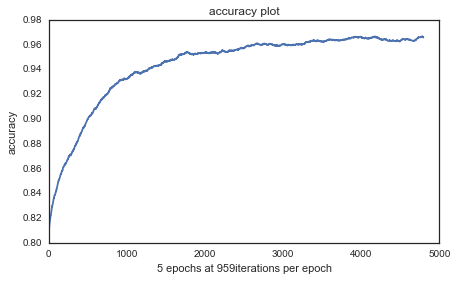

In [31]:
nnet.plot_metric_batch(metric_type='accuracy')

In [26]:
nnet1 = nnet_classifier.nnet_classifer()

In [27]:
nnet1.transform_to_binary(X_test, y_train, y_test)

Inititialized X_test!
Completed: y_train and y_test transformed to binary!


In [28]:
nnet1.fit(X_train, y_train, architecture='lstm', 
         hidden_layer_size=512, 
         nb_epoch=5,
         batch_normalization=False)

Input Parameters initialized!
Generating preprocessed_X_Train ... 

Number of samples:  37651 

Generating preprocessed_X_Test ... 

Number of samples:  13926 

Building LSTM Model ... 

LSTM Model built !


In [30]:
nnet1.predict(X_test)

13926/13926 [==============================] - 1s     
Test loss LSTM: 0.258082842696
Test accuracy LSTM: 0.902915410024


[0.25808284269587228, 0.90291541002441478]

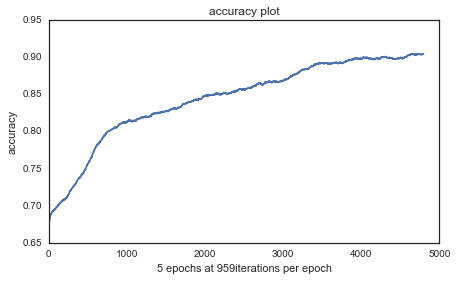

In [32]:
nnet1.plot_metric_batch()

## Multi Layer Perceptron (MLP)

**With batch normalization and window size of 25**

In [34]:
nnet2 = nnet_classifier.nnet_classifer()

In [35]:
nnet2.transform_to_binary(X_test, y_train, y_test)

Inititialized X_test!
Completed: y_train and y_test transformed to binary!


In [36]:
nnet2.fit(X_train, y_train, architecture='mlp', 
         hidden_layer_size=512, 
         nb_epoch=5,
          window_size=25,
         batch_normalization=True)

Input Parameters initialized!
Building mlp model ...
MLP Model built !


In [37]:
nnet2.predict(X_test)

13926/13926 [==============================] - 1s     
Test loss mlp: 0.0481829251899
Test accuracy mlp: 0.985494758007


[0.048182925189900166, 0.98549475800660635]

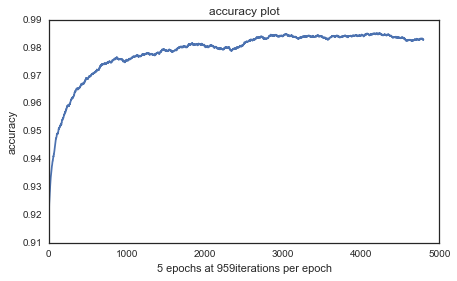

In [38]:
nnet2.plot_metric_batch()

**Without batch normalization and window size of 10 (default)**

In [52]:
nnet3 = nnet_classifier.nnet_classifer()

In [53]:
nnet3.transform_to_binary(X_test, y_train, y_test)

Inititialized X_test!
Completed: y_train and y_test transformed to binary!


In [54]:
nnet3.fit(X_train, y_train, architecture='mlp', 
         hidden_layer_size=512, 
         nb_epoch=5,
         batch_normalization=False)

Input Parameters initialized!
Building mlp model ...
MLP Model built !


In [55]:
nnet3.predict(X_test)

13926/13926 [==============================] - 1s     
Test loss mlp: 0.0796932008493
Test accuracy mlp: 0.973574608646


[0.079693200849341728, 0.97357460864569867]

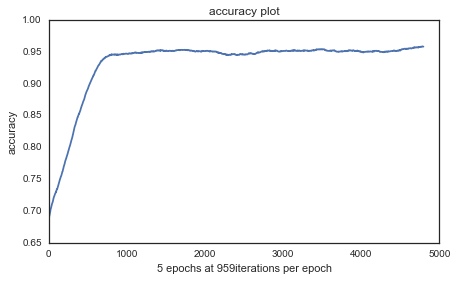

In [59]:
nnet3.plot_metric_batch()

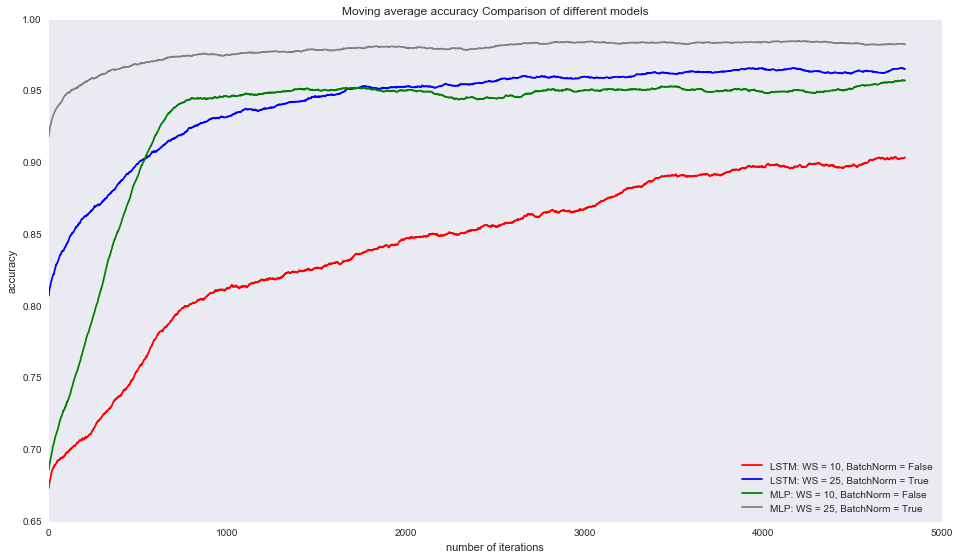

In [97]:
sns.set_style('dark')
plt.figure(figsize=(16,9))
plt.plot(nnet1.sma_acc, color='red', label='LSTM: WS = 10, BatchNorm = False')
plt.plot(nnet.sma_acc, color='blue', label='LSTM: WS = 25, BatchNorm = True')
plt.plot(nnet3.sma_acc, color='green', label='MLP: WS = 10, BatchNorm = False')
plt.plot(nnet2.sma_acc, color='grey', label='MLP: WS = 25, BatchNorm = True')
plt.title('Moving average accuracy Comparison of different models')
plt.legend(loc=4)
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.show()

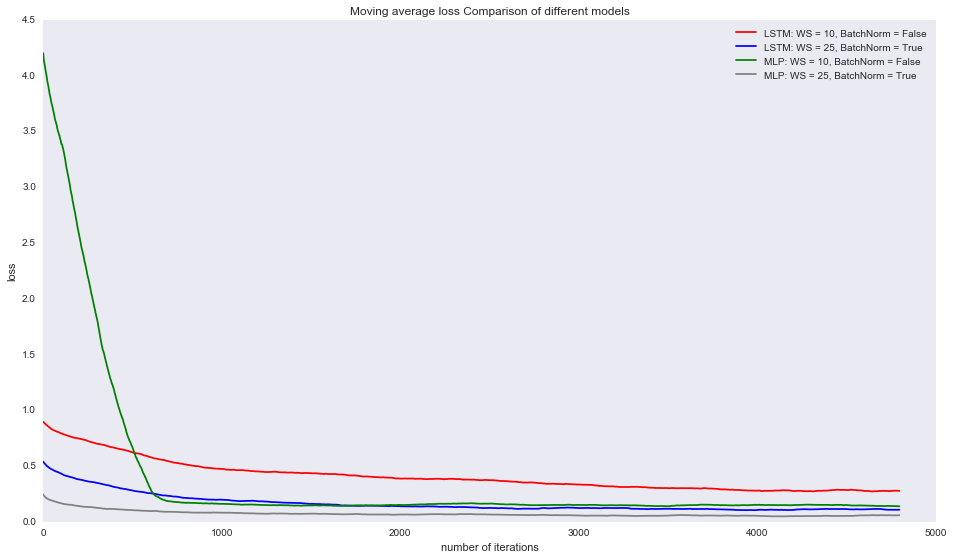

In [98]:
sns.set_style('dark')
plt.figure(figsize=(16,9))
plt.plot(nnet1.sma_loss, color='red', label='LSTM: WS = 10, BatchNorm = False')
plt.plot(nnet.sma_loss, color='blue', label='LSTM: WS = 25, BatchNorm = True')
plt.plot(nnet3.sma_loss, color='green', label='MLP: WS = 10, BatchNorm = False')
plt.plot(nnet2.sma_loss, color='grey', label='MLP: WS = 25, BatchNorm = True')
plt.title('Moving average loss Comparison of different models')
plt.legend(loc=1)
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.show()

## Using the MLP-Batch Normalization model with different update methods:

**RMSProp**

In [64]:
nnet4 = nnet_classifier.nnet_classifer()

In [65]:
nnet4.transform_to_binary(X_test, y_train, y_test)

Inititialized X_test!
Completed: y_train and y_test transformed to binary!


In [67]:
nnet4.fit(X_train, y_train, architecture='mlp', 
         hidden_layer_size=512,
          window_size = 25,
         nb_epoch=5, update_method='RMSprop',
         batch_normalization=True)

Input Parameters initialized!
Building mlp model ...
MLP Model built !


In [68]:
nnet4.predict(X_test)

13926/13926 [==============================] - 1s     
Test loss mlp: 0.0671971401091
Test accuracy mlp: 0.981832543444


[0.06719714010910742, 0.9818325434439179]

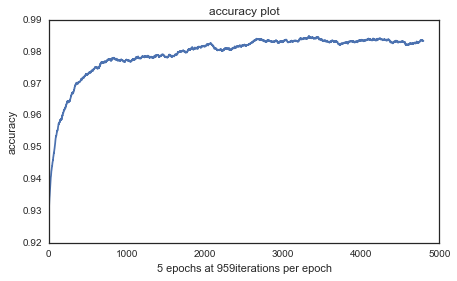

In [69]:
nnet4.plot_metric_batch()

**Adadelta**

Inititialized X_test!
Completed: y_train and y_test transformed to binary!
Input Parameters initialized!
Building mlp model ...
MLP Model built !
13926/13926 [==============================] - 1s     
Test loss mlp: 0.0580223430563
Test accuracy mlp: 0.983627746661


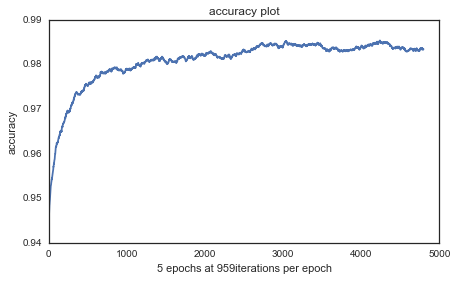

In [70]:
nnet5 = nnet_classifier.nnet_classifer()
nnet5.transform_to_binary(X_test, y_train, y_test)
nnet5.fit(X_train, y_train, architecture='mlp', 
         hidden_layer_size=512,
          window_size = 25,
         nb_epoch=5, update_method='Adadelta',
         batch_normalization=True)
nnet5.predict(X_test)
nnet5.plot_metric_batch()

**Adamax**

Inititialized X_test!
Completed: y_train and y_test transformed to binary!
Input Parameters initialized!
Building mlp model ...
MLP Model built !
13926/13926 [==============================] - 1s     
Test loss mlp: 0.0393747671465
Test accuracy mlp: 0.988079850639


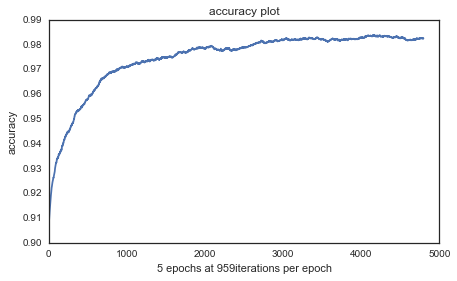

In [71]:
nnet6 = nnet_classifier.nnet_classifer()
nnet6.transform_to_binary(X_test, y_train, y_test)
nnet6.fit(X_train, y_train, architecture='mlp', 
         hidden_layer_size=512,
          window_size = 25,
         nb_epoch=5, update_method='Adamax',
         batch_normalization=True)
nnet6.predict(X_test)
nnet6.plot_metric_batch()

**Adagrad**

Inititialized X_test!
Completed: y_train and y_test transformed to binary!
Input Parameters initialized!
Building mlp model ...
MLP Model built !
13926/13926 [==============================] - 1s     
Test loss mlp: 0.0379696842191
Test accuracy mlp: 0.988941548183


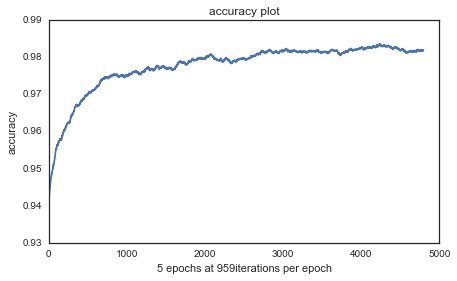

In [74]:
nnet7 = nnet_classifier.nnet_classifer()
nnet7.transform_to_binary(X_test, y_train, y_test)
nnet7.fit(X_train, y_train, architecture='mlp', 
         hidden_layer_size=512,
          window_size = 25,
         nb_epoch=5, update_method='Adagrad',
         batch_normalization=True)
nnet7.predict(X_test)
nnet7.plot_metric_batch()

## Comparison of different update methods

**Loss comparison**

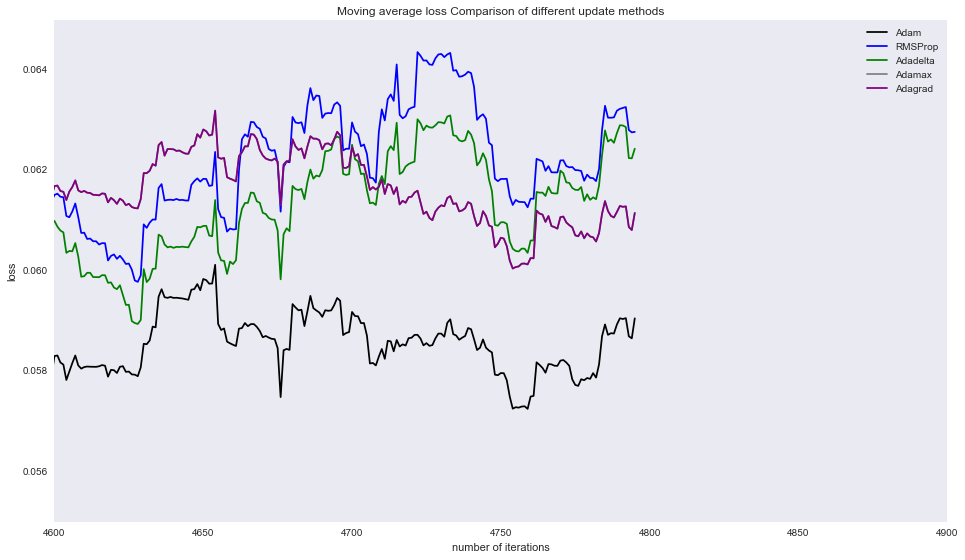

In [129]:
sns.set_style('dark')
plt.figure(figsize=(16,9))
plt.plot(nnet2.sma_loss, color='black', label='Adam')
plt.plot(nnet4.sma_loss, color='blue', label='RMSProp')
plt.plot(nnet5.sma_loss, color='green', label='Adadelta')
plt.plot(nnet6.sma_loss, color='grey', label='Adamax')
plt.plot(nnet6.sma_loss, color='purple', label='Adagrad')
plt.title('Moving average loss Comparison of different update methods')
# Uncomment to zoom in closer to the finish line
plt.xlim((4600,4900))
plt.ylim((0.055,0.065))
plt.legend(loc=1)
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.show()

** Accuracy comparison **

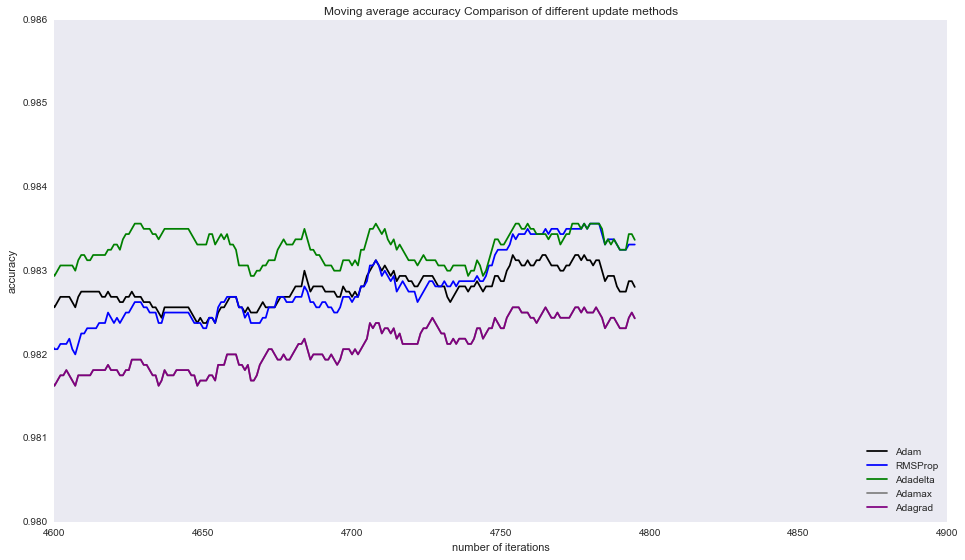

In [130]:
sns.set_style('dark')
plt.figure(figsize=(16,9))
plt.plot(nnet2.sma_acc, color='black', label='Adam')
plt.plot(nnet4.sma_acc, color='blue', label='RMSProp')
plt.plot(nnet5.sma_acc, color='green', label='Adadelta')
plt.plot(nnet6.sma_acc, color='grey', label='Adamax')
plt.plot(nnet6.sma_acc, color='purple', label='Adagrad')
plt.title('Moving average accuracy Comparison of different update methods')
# Uncomment to zoom in closer to the finish line
plt.xlim((4600,4900))
plt.ylim((0.98,0.986))
plt.legend(loc=4)
plt.xlabel('number of iterations')
plt.ylabel('accuracy')
plt.show()

## Looking back at models from ML1

**Good old logistic regression**

In [22]:
# Logistic regression

# instantiate a logistic regression model, and fit with X and y
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# Predict the result
model2_prediction = model2.predict(X_test)

# check the accuracy on the training set
model2.score(X_test, y_test)

0.84793847744603856

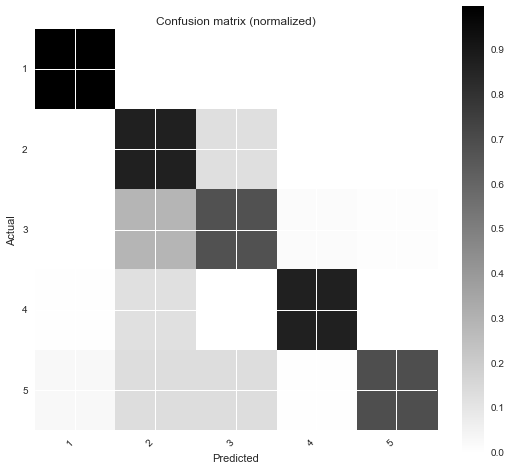

In [23]:
cm = ConfusionMatrix(y_test, model2_prediction)
cm.plot(normalized=True);

## All models initialized with default parameters

In [105]:
# Defining objects
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [106]:
# Fitting the data
rfc.fit(X_train, y_train) 
etc.fit(X_train, y_train) 
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [107]:
# Generating predicted values
rfc_pred_vals = rfc.predict(X_test)
etc_pred_vals = etc.predict(X_test)
gbc_pred_vals = gbc.predict(X_test)

In [108]:
# Finding out the accuracy
accuracy_rfc = metrics.accuracy_score(y_test,rfc_pred_vals)
accuracy_etc = metrics.accuracy_score(y_test,etc_pred_vals)
accuracy_gbc = metrics.accuracy_score(y_test,gbc_pred_vals)

In [109]:
models = ["RandomForest Classifier","ExtraTrees Classifier","Gradient Boosting Classifier"]

In [110]:
accuracy = [accuracy_rfc,accuracy_etc, accuracy_gbc]

In [111]:
sorted_models_accuracy = [model for acc, model in sorted(zip(accuracy, models), reverse=True)]

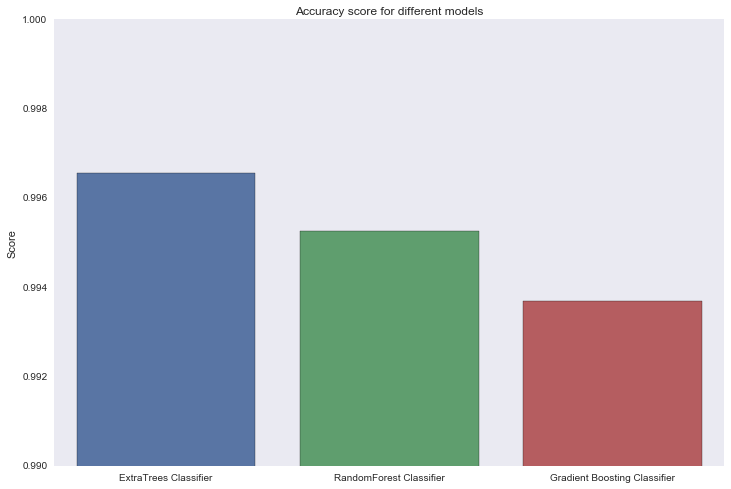

In [113]:
plt.figure(figsize=[12,8])
sns.barplot(x=sorted_models_accuracy, y=sorted(accuracy, reverse=True))
plt.ylabel('Score')
plt.ylim((0.99,1.00))
plt.title('Accuracy score for different models')
plt.show()

In [114]:
# Defining a function to calculate f1 scores and accuracy
def cross_validation_scores(X_train, X_test, y_train, y_test, model):
    '''
    INPUT: Train data and test data for X and y, Model name
    OUTPUT: Array(f1_scores), Array(accuracy_score)
    '''
    # Getting the best model
    i_model = model
    # Fitting the data
    i_model.fit(X_train,y_train)
    # Calculating f1 weighted scores
    f1_scores = cross_val_score(i_model,X_test,y_test,cv=20, scoring="f1_weighted")
    # Calculating accuracy
    acc_scores = cross_val_score(i_model,X_test,y_test,cv=20, scoring="accuracy")
    # Return f1 score and accuracy
    return f1_scores, acc_scores

In [118]:
# Plot the cross_val_scores
def plot_cv_scores(cv_scores, label):
    sns.set_style('white')
    plt.figure(figsize=(15,8))
    plt.plot(cv_scores[0])
    plt.plot(cv_scores[1])
    plt.xlim((0,16));
    plt.xlabel('cross-validation generator values')
    plt.ylabel('Score')
    plt.title('Cross Validation Scores for ' + str(label))
    plt.legend(["F1-Score","Accuracy"], loc=4)
    plt.show()

In [116]:
cross_val_scores_etc = cross_validation_scores(X_train, X_test, y_train, y_test, etc)

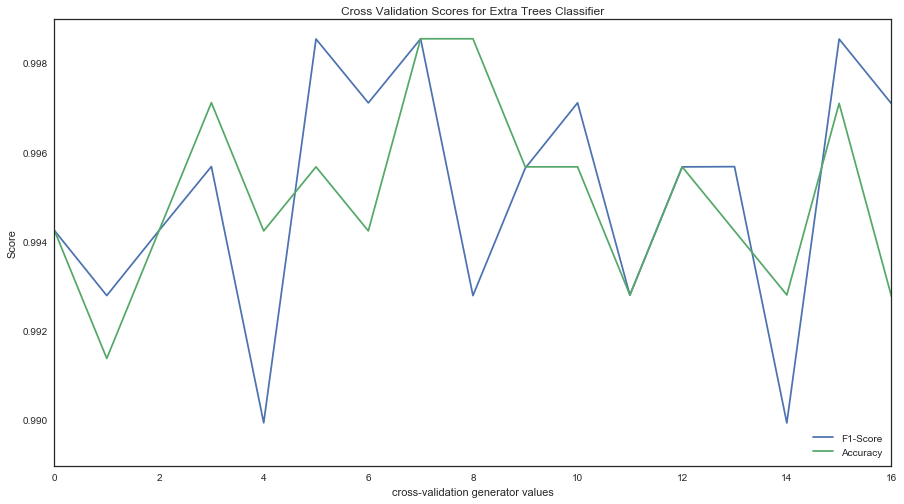

In [119]:
plot_cv_scores(cross_val_scores_etc, "Extra Trees Classifier")

In [120]:
print np.mean(cross_val_scores_etc[1])

0.994829098077


In [121]:
cm_best_model = ConfusionMatrix(y_test, etc_pred_vals)
cm_best_model

Predicted     1     2     3     4    5  __all__
Actual                                         
1          4214     0     0     0    1     4215
2             0  4060    14     1    0     4075
3             0    19  3654     1    1     3675
4             0     1     3  1018    2     1024
5             0     0     5     0  932      937
__all__    4214  4080  3676  1020  936    13926

## Keras playground

In [1]:
'''Trains and evaluate a simple MLP on the classification problem'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras.layers import recurrent

Using Theano backend.


In [122]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Convert class vector to binary class matrix (for use with categorical_crossentropy)')
print('Y_train shape:', y_train.shape)
print('Y_test shape:', y_test.shape)

('X_train shape:', (37651, 12))
('X_test shape:', (13926, 12))
Convert class vector to binary class matrix (for use with categorical_crossentropy)
('Y_train shape:', (37651,))
('Y_test shape:', (13926,))


In [39]:
features = X_train.shape[1]

In [40]:
classes = len(np.unique(y_test))

In [41]:
batch_size = 32
nb_epoch = 10
features, classes

(12, 5)

In [42]:
y_binary_test = to_categorical(y_test)
y_binary_train = to_categorical(y_train)

In [43]:
y_binary_test = y_binary_test[:,1:6]
y_binary_train = y_binary_train[:,1:6]

In [222]:
yTest.shape
len(y_test)

15474

In [249]:

# model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, data_dim)))
window_size = 25
feature_size = 12

def preprocess(window_size, x, y):
    sample_size = x.shape[0]
    feature_size = x.shape[1]
    preprocessed_X = np.zeros((sample_size, window_size, feature_size))
    
    print("print(len(y))",len(y))
    for y_index in range(len(y)):
        
#         each_x = np.zeros((window_size, feature_size))
        for each_x_index, x_index in zip(range(window_size), range(y_index-window_size+1, y_index+1)):
            if x_index >=0:
                preprocessed_X[y_index, each_x_index,:] =  x[x_index]
#                 each_x[each_x_index] = x[x_index]
    return preprocessed_X

preprocessed_X_Train = preprocess(window_size, X_train, y_train)
preprocessed_X_Test = preprocess(window_size,X_test,y_test)
preprocessed_X_Train.shape


print(len(y)) 37651
print(len(y)) 13926


(37651, 25, 12)

In [44]:
print('Building model...')

model = Sequential()
model.add(Dense(512, input_shape=(features,)))
model.add(BatchNormalization(epsilon=1e-06, mode=0, axis=-1, momentum=0.9, weights=None, beta_init='zero', gamma_init='one'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_binary_train,
                    nb_epoch=nb_epoch, batch_size=batch_size,
                    verbose=1, validation_split=0.1)
score = model.evaluate(X_test, y_binary_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Building model...
Train on 33885 samples, validate on 3766 samples
Epoch 1/10
33885/33885 [==============================] - 5s - loss: 0.1706 - acc: 0.9454 - val_loss: 0.0784 - val_acc: 0.9681
Epoch 2/10
33885/33885 [==============================] - 4s - loss: 0.0747 - acc: 0.9778 - val_loss: 0.0316 - val_acc: 0.9899
Epoch 3/10
33885/33885 [==============================] - 4s - loss: 0.0643 - acc: 0.9817 - val_loss: 0.0337 - val_acc: 0.9923
Epoch 4/10
33885/33885 [==============================] - 4s - loss: 0.0559 - acc: 0.9837 - val_loss: 0.0298 - val_acc: 0.9907
Epoch 5/10
33885/33885 [==============================] - 4s - loss: 0.0549 - acc: 0.9839 - val_loss: 0.0372 - val_acc: 0.9870
Epoch 6/10
33885/33885 [==============================] - 4s - loss: 0.0515 - acc: 0.9847 - val_loss: 0.0244 - val_acc: 0.9934
Epoch 7/10
33885/33885 [==============================] - 4s - loss: 0.0486 - acc: 0.9856 - val_loss: 0.0261 - val_acc: 0.9939
Epoch 8/10
33885/33885 [====================

In [35]:
classes, features

(5, 12)

In [36]:
nnet.outputLayerSize, nnet.inputLayerSize

(5, 12)